## Proof Of Homoscedasticity Assumption

 The assumption of homoscedasticity, also known as the assumption of constant variance of residuals, is a key assumption in regression analysis. It refers to the requirement that the variance of the residuals (or errors) should be consistent (i.e., constant) across all levels of the independent variables. In simpler terms, homoscedasticity means that the spread of the residuals should be uniform and not exhibit any systematic patterns as you move along the range of predicted values.

### Steps to follow

Residual Plot:

Begin by plotting the residuals against the fitted values (predicted values) from your regression model.
Look for any discernible patterns or trends in the plot. Specifically, check for constant spread of residuals across different levels of fitted values. A visual inspection of the plot can provide an initial indication of homoscedasticity.

Plotting Standardized Residuals:

Compute standardized residuals by dividing each residual by its standard deviation.
Plot the standardized residuals against the fitted values.
Examine whether the spread of standardized residuals remains relatively consistent across different levels of fitted values.

Breusch-Pagan Test:

Perform the Breusch-Pagan test, which formally tests for homoscedasticity in regression models.
The test assesses whether the variance of residuals is constant across observations.
A significant p-value (typically < 0.05) suggests heteroscedasticity, indicating a violation of the homoscedasticity assumption.

White Test:

Alternatively, you can use the White test, which is another common test for homoscedasticity.
This test is more robust than the Breusch-Pagan test and can handle cases where residuals are correlated.
As with the Breusch-Pagan test, a significant p-value suggests heteroscedasticity.

Goldfeld-Quandt Test:

If your data exhibit a clear structure (e.g., a time series dataset with temporal ordering), you may consider the Goldfeld-Quandt test.
This test compares the variances of residuals between two subsets of data to assess homoscedasticity.
A non-significant result indicates homoscedasticity.


Residual Plots with Additional Variables:

Plot residuals against individual predictor variables to identify any specific predictors that might contribute to heteroscedasticity.
If you observe patterns in these plots (e.g., funnel shape), it may indicate heteroscedasticity related to certain predictors.
By systematically examining these diagnostic tools, you can gain insight into whether the assumption of homoscedasticity holds in your regression model. If heteroscedasticity is detected, you may need to consider robust regression techniques or transformation of variables to address the issue.

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [12]:
data = 'cleaned_df.zip'

In [13]:
df = pd.read_csv(data, index_col=0)

In [14]:
df.head()

,location,bath,balcony,price,House_size,new_total_sqft
2,Uttarahalli,2.0,3.0,62.00,3.0,1440.0
3,Lingadheeranahalli,3.0,1.0,95.00,3.0,1521.0
4,Kothanur,2.0,1.0,51.00,2.0,1200.0
8,Marathahalli,3.0,1.0,63.25,3.0,1310.0
10,Whitefield,2.0,2.0,70.00,3.0,1800.0


In [15]:
df.shape

(6996, 6)

In [16]:
df = df.drop('location', axis=1)
df.head()

,bath,balcony,price,House_size,new_total_sqft
2,2.0,3.0,62.00,3.0,1440.0
3,3.0,1.0,95.00,3.0,1521.0
4,2.0,1.0,51.00,2.0,1200.0
8,3.0,1.0,63.25,3.0,1310.0
10,2.0,2.0,70.00,3.0,1800.0


In [17]:
X = df.drop('price', axis=1)
y = df['price']

X = sm.add_constant(X)  # Add constant term for intercept
model = sm.OLS(y, X).fit()  # Fit ordinary least squares (OLS) regression model

In [18]:
## Compute residuals and fitted values
fitted_values = model.predict(X)  # Fitted values (predicted values)
residuals = model.resid  # Residuals (actual - predicted)


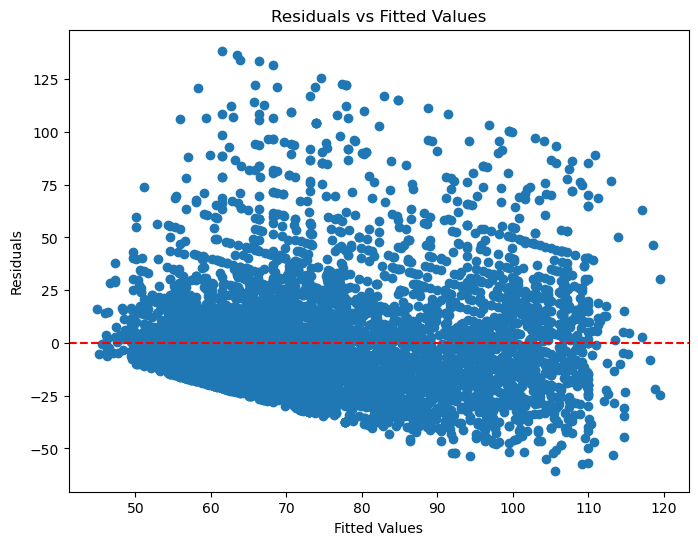

In [19]:
# Step 3: Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add horizontal line at y=0
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


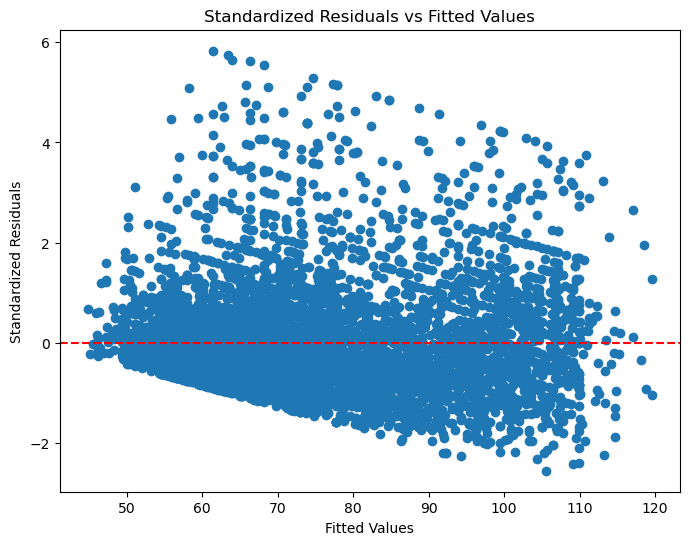

In [20]:
# Step 4: Plotting Standardized Residuals
std_residuals = model.get_influence().resid_studentized_internal  # Standardized residuals
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, std_residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add horizontal line at y=0
plt.title('Standardized Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.show()

In [26]:
# Breusch-Pagan Test
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, X)
print('Breusch-Pagan Test:')
print('LM Statistic:', bp_test[0])
print('LM-Test p-value:', bp_test[1])

Breusch-Pagan Test:
LM Statistic: 230.2722633195376
LM-Test p-value: 1.1534020225735539e-48


In [22]:
# Step 6: White Test
white_test = sm.stats.diagnostic.het_white(residuals, X)
print('White Test:')
print('LM Statistic:', white_test[0])
print('LM-Test p-value:', white_test[1])

White Test:
LM Statistic: 668.1055646612735
LM-Test p-value: 2.247353958827778e-134


In [24]:
# Goldfeld-Quandt Test (if applicable)
gq_test = sm.stats.diagnostic.het_goldfeldquandt(residuals, X)
print('Goldfeld-Quandt Test:')
print('F Statistic:', gq_test[0])
print('F-Test p-value:', gq_test[1])

Goldfeld-Quandt Test:
F Statistic: 1.0020449009220067
F-Test p-value: 0.47593348666705093


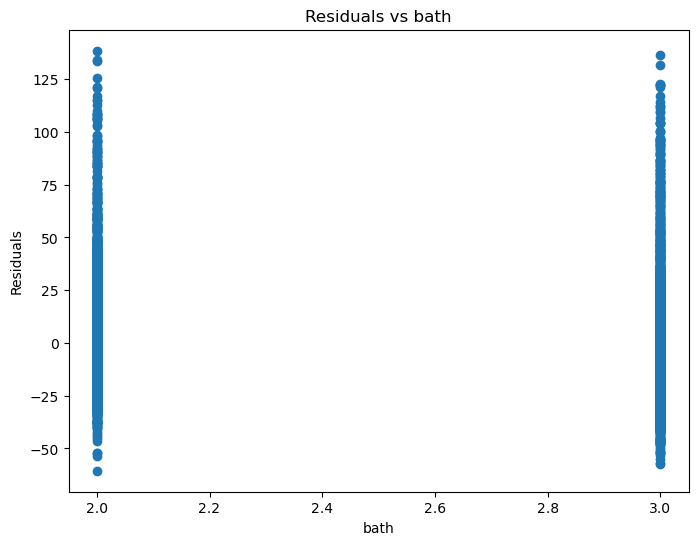

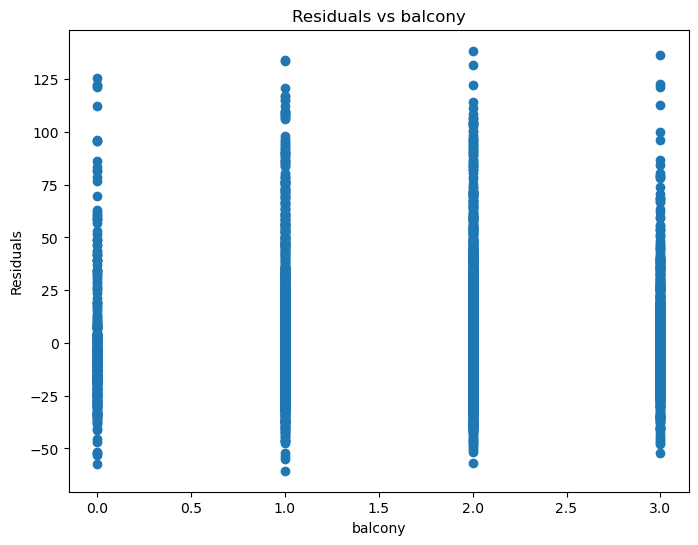

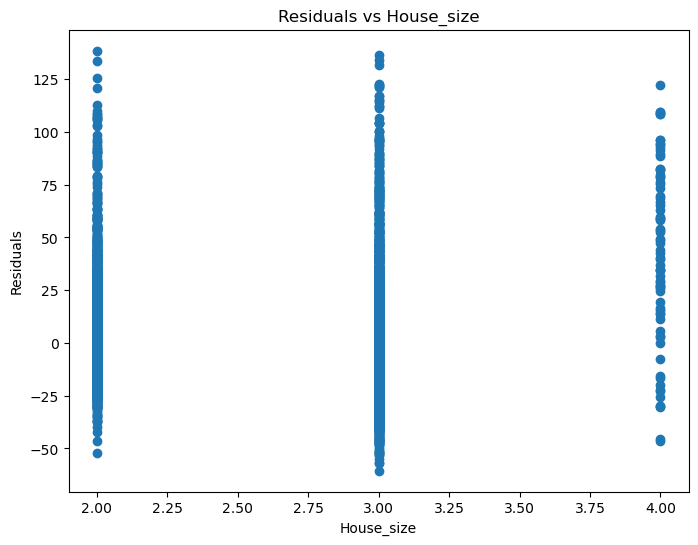

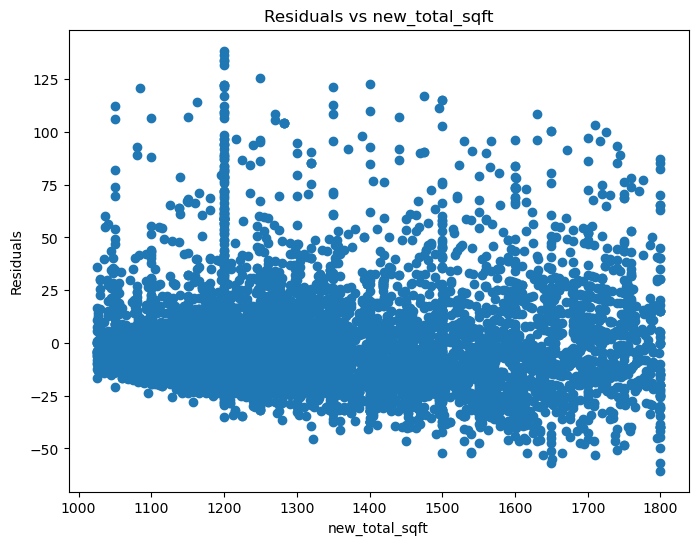

In [29]:
# Residual Plots with Additional Variables (if needed)
for predictor in X.columns[1:]:  # Exclude the intercept column (constant term)
    plt.figure(figsize=(8, 6))
    plt.scatter(df[predictor], residuals)
    plt.title(f'Residuals vs {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('Residuals')
    plt.show()


### Interpreting the result

Interpreting the results from these diagnostic tests involves understanding their purpose in assessing the assumption of homoscedasticity in regression models.

Breusch-Pagan Test:

LM Statistic: This value (230.27) is the Lagrange Multiplier (LM) statistic calculated by the Breusch-Pagan test.
LM-Test p-value: The p-value (1.15e-48) associated with the LM statistic tests the null hypothesis that the variance of the residuals is constant (homoscedasticity).
Interpretation: With an extremely small p-value (much less than the conventional threshold of 0.05), we reject the null hypothesis of homoscedasticity. This indicates strong evidence of heteroscedasticity in the regression model.

White Test:

LM Statistic: This value (668.11) represents the LM statistic computed by the White test.
LM-Test p-value: The p-value (2.25e-134) associated with the White test assesses whether the residuals exhibit constant variance.
Interpretation: Similar to the Breusch-Pagan test, the very small p-value strongly rejects the null hypothesis of homoscedasticity. It provides further evidence of heteroscedasticity in the regression model.

Goldfeld-Quandt Test:

F Statistic: The F-statistic (1.002) calculated by the Goldfeld-Quandt test compares the variance of residuals between two subsets of data.
F-Test p-value: The p-value (0.476) associated with the F-statistic tests the null hypothesis that the variances of residuals are equal between the subsets.
Interpretation: With a non-significant p-value (greater than 0.05), we do not reject the null hypothesis. This suggests that there is no evidence of heteroscedasticity in the context of this specific test.

Summary:

The Breusch-Pagan and White tests both strongly indicate the presence of heteroscedasticity in the regression model, as evidenced by their very low p-values.
The Goldfeld-Quandt test, however, does not provide evidence of heteroscedasticity based on its non-significant p-value.